# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the "Financial Inclusion in Africa" dataset from local Colab storage

file_path = "Train_v2.csv"

try:
    df = pd.read_csv(file_path)
    print("Data loaded successfully from local storage!")
except FileNotFoundError:
    print(f"Error: '{file_path}' not found. Please ensure the file is uploaded to the Colab environment.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# 2. SIMULATE MISSING VALUES

np.random.seed(42)
mask = np.random.choice([True, False], size=df.shape, p=[0.05, 0.95])
df_messy = df.mask(mask) # Create a copy with 5% missing values

print("Original Shape:", df_messy.shape)
print("\nMissing Values before cleaning:\n", df_messy.isnull().sum())

# 3. HANDLING DATA

# A. Impute Missing Values
# For numeric columns (like age), fill with MEAN
num_cols = df_messy.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df_messy[col] = df_messy[col].fillna(df_messy[col].mean())

# For categorical columns (like job_type), fill with MODE (most frequent)
# We define cat_cols here just for imputation
cat_cols = df_messy.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_messy[col] = df_messy[col].fillna(df_messy[col].mode()[0])

# B. Encode Categorical Data

# Drop uniqueid explicitly
if 'uniqueid' in df_messy.columns:
    df_messy = df_messy.drop(['uniqueid'], axis=1)


df_encoded = pd.get_dummies(df_messy, drop_first=True)

# Convert to numpy array for the PCA steps (as requested by instructions)
X = df_encoded.values.astype(float) # Convert to float to ensure compatibility with np.isnan
print("\nFinal Processed Data Shape:", X.shape)
print("Any missing values left?", np.isnan(X).sum())

Data loaded successfully from local storage!
Original Shape: (23524, 13)

Missing Values before cleaning:
 country                   1197
year                      1160
uniqueid                  1144
bank_account              1140
location_type             1143
cellphone_access          1140
household_size            1179
age_of_respondent         1196
gender_of_respondent      1149
relationship_with_head    1144
marital_status            1118
education_level           1199
job_type                  1150
dtype: int64

Final Processed Data Shape: (23524, 33)
Any missing values left? 0


### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

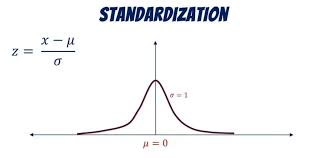


In [21]:
# Step 1: Load and Standardize the data (use of numpy only allowed)

# Calculate Mean and Standard Deviation manually using Numpy
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Avoid division by zero
std_dev[std_dev == 0] = 1

# Apply Standardization Formula: Z = (X - μ) / σ
standardized_data = (X - mean) / std_dev

# Display the first 5 rows
print("Standardized Data Shape:", standardized_data.shape)
print(standardized_data[:5])

Standardized Data Shape: (23524, 33)
[[ 1.24027434 -0.36791768 -0.92083411 -0.82166942 -0.60347713 -0.30349251
   2.53254891 -0.76818233  0.57073979 -0.80056481 -1.14619379 -0.08805641
  -0.16817158 -0.21463694  1.67140111 -0.01844435  1.03548731 -0.69097944
  -0.3508253  -0.03573404 -1.14391336  2.21029728 -0.22158829 -0.18296679
  -0.53086924 -0.1262382  -0.21224195 -0.10173937 -0.54033284 -0.16053262
  -0.21442012 -0.33714621  1.49614041]
 [ 1.24027434  0.55141367  1.93417138 -0.82166942 -0.60347713 -0.30349251
  -0.39485911 -0.76818233 -1.75211192 -0.80056481  0.87245282 -0.08805641
  -0.16817158 -0.21463694 -0.59830043 -0.01844435 -0.96572888 -0.69097944
   2.85042155 -0.03573404 -1.14391336 -0.45242783 -0.22158829 -0.18296679
  -0.53086924 -0.1262382  -0.21224195  9.8290365  -0.54033284 -0.16053262
  -0.21442012 -0.33714621 -0.66838647]
 [ 1.24027434  0.55141367 -0.79670344 -0.82166942 -0.60347713 -0.30349251
  -0.39485911  1.30177428  0.57073979  1.2491181  -1.14619379 -0.088056

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

Note: I explicitly dropped the 'uniqueid' column before encoding. This reduced the feature space from ~8,000 columns to 33, significantly improving memory usage and computation time.

In [22]:
# Step 3: Calculate the Covariance Matrix

# The formula for covariance matrix of standardized data is (X.T @ X) / (n-1)

cov_matrix = np.cov(standardized_data.T)

print("Covariance Matrix Shape:", cov_matrix.shape)
cov_matrix

Covariance Matrix Shape: (33, 33)


array([[ 1.00004251, -0.0484369 , -0.01788297, ...,  0.09532353,
         0.08531647,  0.16364554],
       [-0.0484369 ,  1.00004251, -0.12778317, ...,  0.05288624,
         0.01082393, -0.13000403],
       [-0.01788297, -0.12778317,  1.00004251, ..., -0.01365589,
        -0.05536158, -0.00302548],
       ...,
       [ 0.09532353,  0.05288624, -0.01365589, ...,  1.00004251,
        -0.072294  , -0.1433216 ],
       [ 0.08531647,  0.01082393, -0.05536158, ..., -0.072294  ,
         1.00004251, -0.22535354],
       [ 0.16364554, -0.13000403, -0.00302548, ..., -0.1433216 ,
        -0.22535354,  1.00004251]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [23]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display them
print("First 5 Eigenvalues:", eigenvalues[:5])
print("Eigenvectors Shape:", eigenvectors.shape)

First 5 Eigenvalues: [3.37641402 2.50498872 2.25794235 1.9834851  1.70482552]
Eigenvectors Shape: (33, 33)


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [24]:
# Step 5: Sort Principal Components

# np.argsort gives indices that sort the array
sorted_indices = np.argsort(eigenvalues)[::-1]

# Reorder both values and vectors using these indices
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Print sorted eigenvalues to check
print("Top 10 Sorted Eigenvalues:", sorted_eigenvalues[:10])

Top 10 Sorted Eigenvalues: [3.37641402 2.50498872 2.25794235 1.9834851  1.70482552 1.56843689
 1.31310974 1.23204004 1.16823785 1.11076401]


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [25]:
# Step 6: Project Data onto Principal Components

# We'll pick 2 components to make it easy to visualize in 2D
num_components = 2

# Select the top 2 eigenvectors
eigenvector_subset = sorted_eigenvectors[:, :num_components]

# Project the data: Dot Product of Data and Eigenvectors
# Formula: X_reduced = X_standardized · W
reduced_data = np.dot(standardized_data, eigenvector_subset)

reduced_data[:5]

array([[ 0.12726138, -2.30101101],
       [ 0.14371671,  3.46984612],
       [ 2.71368621, -1.40650462],
       [-0.28964849,  0.04262862],
       [ 1.64633877, -0.445098  ]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [26]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}') # Should be (Rows, 2)
print(reduced_data[:5])

Reduced Data Shape: (23524, 2)
[[ 0.12726138 -2.30101101]
 [ 0.14371671  3.46984612]
 [ 2.71368621 -1.40650462]
 [-0.28964849  0.04262862]
 [ 1.64633877 -0.445098  ]]


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

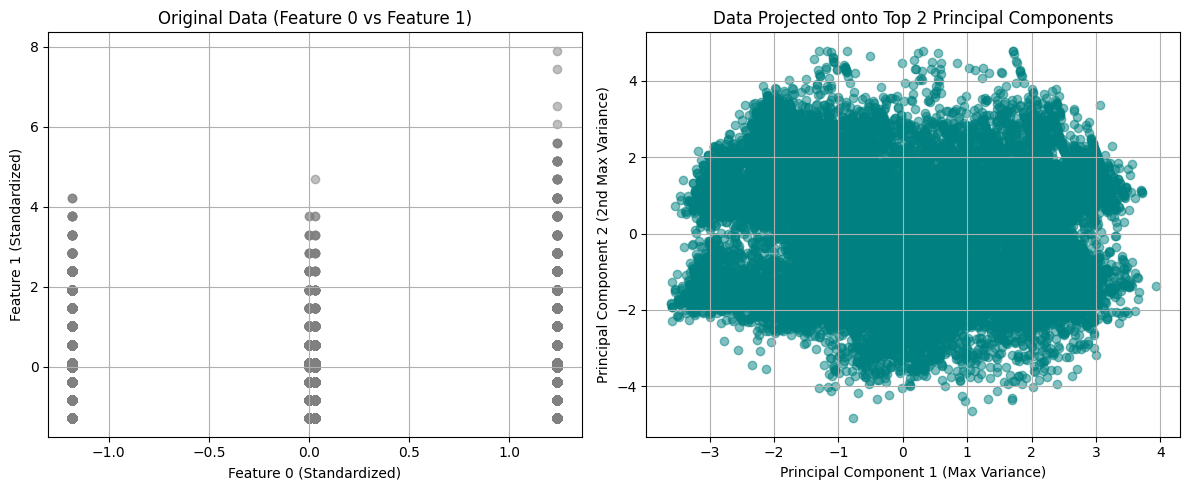

Observation: The PCA plot aligns the data along the axes of greatest variation,
revealing structure that might be hidden when just looking at two random features.


In [27]:
# Step 8: Visualize Before and After PCA

plt.figure(figsize=(12, 5))

# Plot 1: Original Data (First 2 Features only)

plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5, c='gray')
plt.title("Original Data (Feature 0 vs Feature 1)")
plt.xlabel("Feature 0 (Standardized)")
plt.ylabel("Feature 1 (Standardized)")
plt.grid(True)

# Plot 2: PCA Reduced Data (PC1 vs PC2)
# This captures the MAXIMUM variance possible in 2D.
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, c='teal')
plt.title("Data Projected onto Top 2 Principal Components")
plt.xlabel("Principal Component 1 (Max Variance)")
plt.ylabel("Principal Component 2 (2nd Max Variance)")
plt.grid(True)

plt.tight_layout()
plt.show()


print("Observation: The PCA plot aligns the data along the axes of greatest variation,")
print("revealing structure that might be hidden when just looking at two random features.")

Number of components needed to explain 95% variance: 26
Top 5 components explain 35.84% of the data.


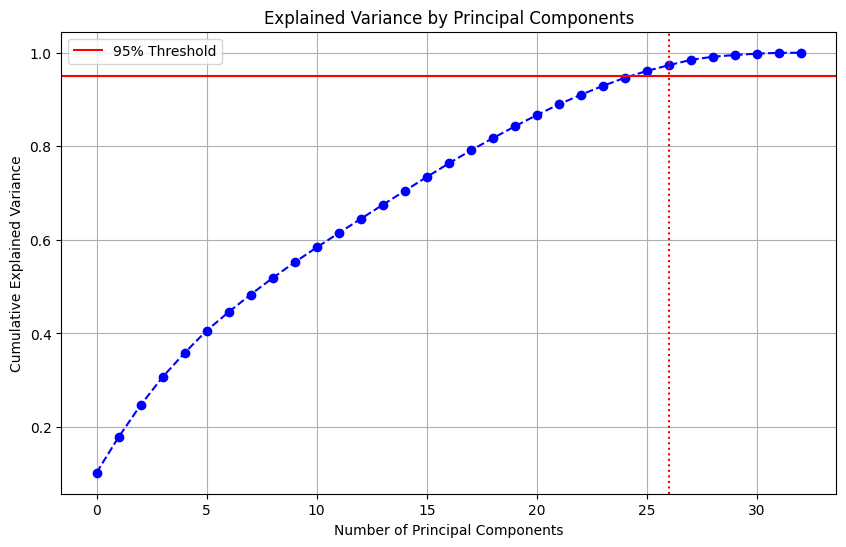


Analysis: To reduce dimensionality while retaining 95.0% of the information,
we dynamically selected the top 26 principal components.


In [28]:
# Step 9: Analyze Explained Variance & Dynamic Selection

# 1. Calculate Explained Variance Ratio

total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance

# 2. Calculate Cumulative Variance
# This helps us see how much total information we keep as we add components.
cumulative_variance = np.cumsum(explained_variance_ratio)

# 3. Dynamic Selection
# We want to keep enough components to explain 95% of the variance.
threshold = 0.95
# Find the first index where cumulative variance >= 0.95
# We add +1 because indices start at 0
n_components_95 = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components needed to explain 95% variance: {n_components_95}")
print(f"Top 5 components explain {cumulative_variance[4]*100:.2f}% of the data.")

# 4. Visualization: The Scree Plot (The "Elbow" Curve)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Threshold')
plt.axvline(x=n_components_95, color='r', linestyle=':')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()


print(f"\nAnalysis: To reduce dimensionality while retaining {threshold*100}% of the information,")
print(f"we dynamically selected the top {n_components_95} principal components.")